# Test Functions and Blind Search Algorithm
In this notebook, we will explore a set of benchmark test functions, visualize them in 3D, and implement the blind search algorithm to locate their global optima.

## Test Functions
In this section, we will examine the benchmark test functions, describe their characteristics, and visualize them. To facilitate the visualizations, we will first import the necessary packages and define a `plot_3d` function, which will allow us to plot the test functions of a class containing these functions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.function import Function

def plot_3d(evaluation_function, params=(-5, 5), resolution=30):
    x = np.linspace(*params, resolution)
    y = np.linspace(*params, resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(resolution):
        for j in range(resolution):
            Z[i, j] = evaluation_function(np.array([X[i, j], Y[i, j]]))
            
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none', alpha=0.9)
    ax.set_title(f"{str.capitalize(evaluation_function.__name__)} function")
    plt.show()

func = Function("benchmark")


### Sphere function

The **Sphere function** is one of the simplest benchmark functions used in optimization. It is defined as:

$f(x) = \sum_{i=1}^{n} x_i^2$


- **Global minimum:** $x = 0$, where $f(x) = 0$.  
- **Characteristics:** Continuous, convex, unimodal, and smooth. It is often used to test basic optimization algorithms because the landscape is simple and symmetric.

```python
def sphere(params: np.ndarray) -> float:
    return float(np.sum(params**2))
```

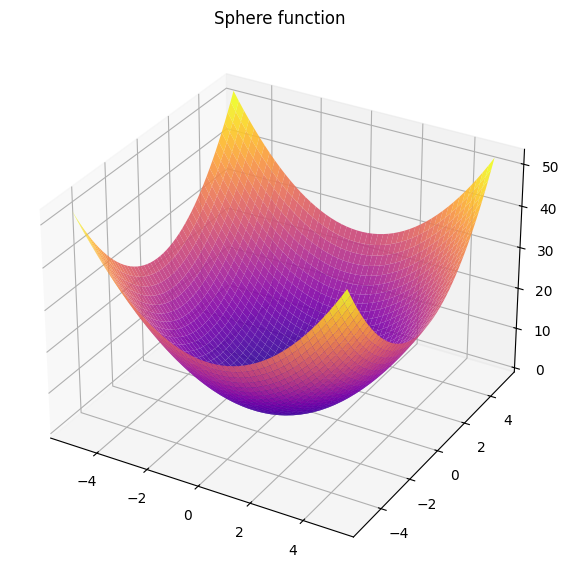

In [2]:
plot_3d(Function.sphere, params=(-5.12, 5.12), resolution=50)

#### Modified Sphere Function

The **Modified Sphere function** introduces a few changes for experimentation:

Dimension-specific: 
- Defined for 6-dimensional input vectors only.
- Scaling: Each component is scaled by $2^i$, where $i$ is the index of the variable (from 1 to 6).
- Normalization: The final value is normalized using $(total - 1745) / 899$.
- Error handling: Raises an error if the input vector does not have exactly 6 elements.

It is defined as:

$f(x) = \frac{1}{899}(\sum_{i=1}^{6} x_i^2 2^i - 1745)$


```python
def sphere_modified(params: np.ndarray) -> float:
    if len(params) != 6: 
        raise ValueError("Input must be a vector of length 6")

    i = np.arange(1, 7)
    total = np.sum(params**2 * 2**i)

    return (total - 1745) / 899
```

#### Differences Between the Two Functions:
| Aspect         | Sphere Function         | Modified Sphere Function                                      |
| -------------- | ----------------------- | ------------------------------------------------------------- |
| Dimensionality | Any $n$                 | Fixed at 6                                                    |
| Scaling        | None                    | Scaled by $2^i$                                               |
| Normalization  | None                    | Normalized to a specific range                                |
| Complexity     | Simple, smooth          | Slightly more complex landscape                               |
| Use case       | Basic optimization test | Testing algorithms with scaling and normalization constraints |

The modified version is often used to introduce asymmetry and scaling effects, making the optimization slightly more challenging compared to the original Sphere function.

### Ackley function

The **Ackley function** is a widely used benchmark function in optimization, known for its **many local minima** which make it challenging for optimization algorithms. It is defined as:

$f(x) = -a \exp\Big(-b \sqrt{\frac{1}{n} \sum_{i=1}^{n} x_i^2}\Big) - \exp\Big(\frac{1}{n} \sum_{i=1}^{n} \cos(c x_i)\Big) + a + e$

- **Global minimum:** $x = 0$, where $f(x) = 0$.  
- **Parameters:**
  - $a$ (default 20)
  - $b$ (default 0.2)
  - $c$ (default $2\pi$)  
- **Characteristics:** Continuous, non-convex, multimodal, with a nearly flat outer region and a steep central hole. This landscape tests an algorithm’s ability to escape local minima.

```python
def ackley(params: np.ndarray, a=20, b=0.2, c=2*np.pi) -> float:
    n = len(params)
    sum1 = np.sum(params**2)
    sum2 = np.sum(np.cos(c * params))
    
    term1 = -a * np.exp(-b * np.sqrt(sum1 / n))
    term2 = -np.exp(sum2 / n)
    
    return term1 + term2 + a + np.e
```

**Usage**: The Ackley function is commonly used to evaluate global optimization algorithms because its numerous local minima make convergence to the global minimum challenging.

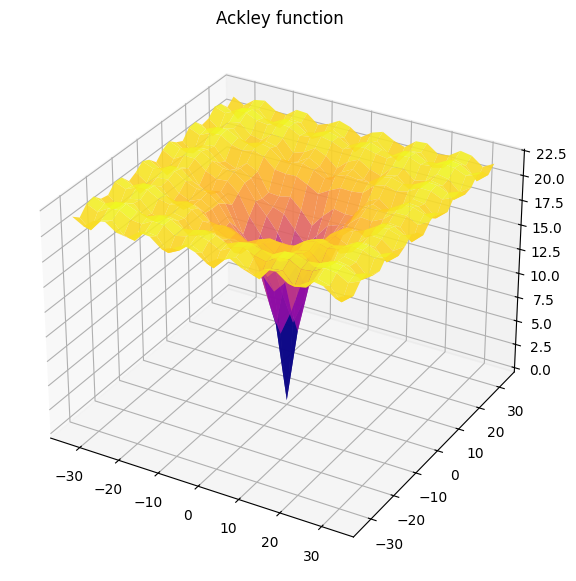

In [3]:
plot_3d(Function.ackley, params=(-32.768, 32.768), resolution=25)

### Rastrigin function

The **Rastrigin function** is a popular benchmark function in optimization, known for its **highly multimodal landscape** with many local minima. It is often used to test global optimization algorithms because its numerous local minima can trap algorithms that rely on local gradient information.

It is defined as:

$f(x) = 10 n + \sum_{i=1}^{n} \left( x_i^2 - 10 \cos(2 \pi x_i) \right)$

- **Global minimum:** \(x = 0\), where \(f(x) = 0\).  
- **Characteristics:** Continuous, separable, multimodal, periodic. The function’s landscape has a large number of regularly spaced local minima.  
- **Parameters:** \(n\) is the dimension of the input vector \(x\).  

```python
def rastrigin(params: np.ndarray) -> float:
    n = len(params)
    total = np.sum(params**2 - 10 * np.cos(2 * np.pi * params))
    return 10 * n + total
```

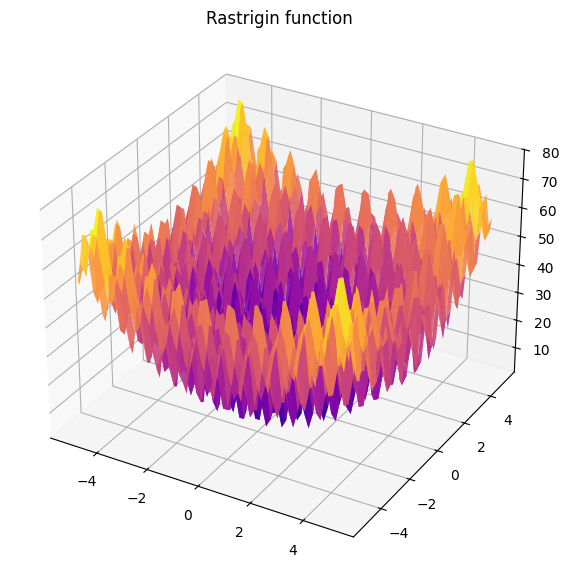

In [12]:
plot_3d(Function.rastrigin, params=(-5.12, 5.12), resolution=60)

### Rosenbrock function

The **Rosenbrock function**, also known as the **banana function**, is a classic benchmark function for optimization algorithms. Its curved, narrow valley makes it **difficult for algorithms that rely on gradient information** to find the global minimum quickly.

It is defined as:

$f(x) = \sum_{i=1}^{n-1} \Big[ 100 (x_{i+1} - x_i^2)^2 + (x_i - 1)^2 \Big]$

- **Global minimum:** $x = [1, 1, \dots, 1]$, where $f(x) = 0$.  
- **Characteristics:** Continuous, non-convex, unimodal, smooth valley. The minimum lies inside a long, narrow, parabolic-shaped valley.  
- **Usage:** Often used to test **convergence speed** of optimization algorithms, especially in higher dimensions.

```python
def rosenbrock(params: np.ndarray) -> float:
    first = params[:-1]
    second = params[1:]
    total = np.sum(100 * (second - first**2)**2 + (first - 1)**2)
    return total
```

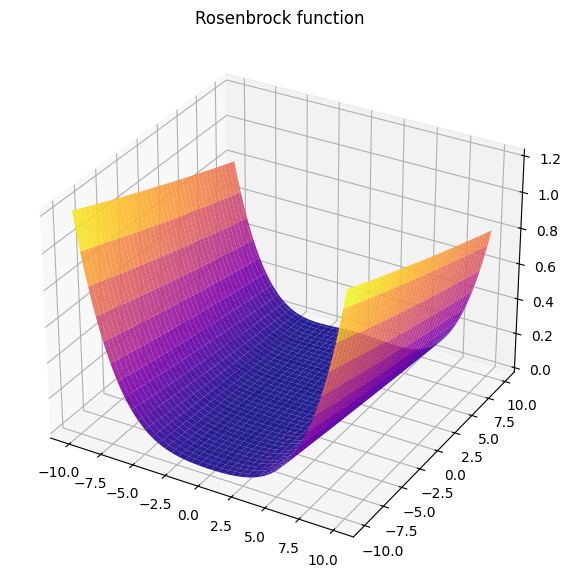

In [17]:
plot_3d(Function.rosenbrock, params=(-10, 10), resolution=80)

### Griewank function

### Schwefel function

### Lévy function

### Michalewicz function